# Tree based separation


Distance matrix variance: 0.0
   Cluster
1        0
2        0
3        0
4        0
6        0


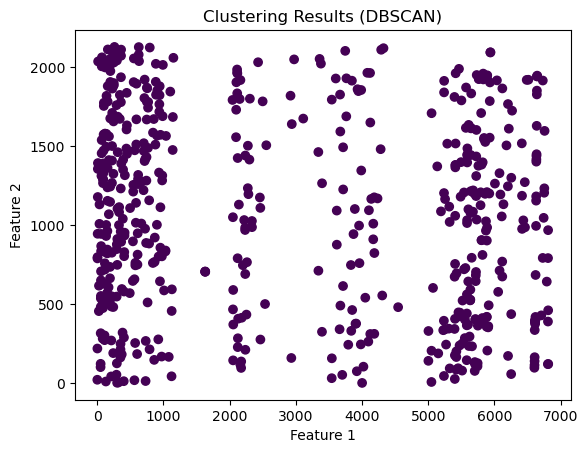

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



df = pd.read_csv("../../data/cleaned_data/Covariates.csv")
# Assuming `df` is your initial DataFrame with both numeric and non-numeric columns
# Convert non-numeric columns to numeric using Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Drop any rows with NaN values if any
df = df.dropna()

# Set a dummy target for Random Forest training (since clustering does not require a true target)
dummy_target = np.zeros(len(df))

# Convert `df` to a numpy array before passing it into the classifier
X = df.to_numpy()

# Initialize and train the Random Forest Classifier
n_trees = 100
rf = RandomForestClassifier(n_estimators=n_trees, max_depth=10, random_state=42)  # Increased depth
rf.fit(X, dummy_target)

# Get the leaf node indices for each sample in each tree
leaf_node_ids = np.array([tree.apply(X) for tree in rf.estimators_]).T

# Calculate the proximity matrix
proximity_matrix = np.zeros((len(df), len(df)))
for i in range(n_trees):
    same_leaf = np.equal.outer(leaf_node_ids[:, i], leaf_node_ids[:, i])
    proximity_matrix += same_leaf

# Normalize the proximity matrix
proximity_matrix /= n_trees
distance_matrix = 1 - proximity_matrix  # Distance = 1 - proximity

# Check the distance matrix variance
print("Distance matrix variance:", np.var(distance_matrix))

# Apply DBSCAN clustering on the distance matrix
dbscan = DBSCAN(metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the DataFrame with clusters
print(df[['Cluster']].head())

# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
